### 06.3 线性二分类的工作原理

解释线性二分法的工作原理，基本公式如下
1. 正向计算

$$
z = x_1 w_1+ x_2 w_2 + b  \tag{1}
$$

2. 分类计算

$$
a={1 \over 1 + e^{-z}} \tag{2}
$$

3. 损失函数计算

$$
loss = -[y \ln (a)+(1-y) \ln (1-a)] \tag{3}
$$

我们的目的是在含有两种样本的空间中划出一条分界线，让双方截然分开。  
那么怎么检测目标点是否在线的两侧呢，我们先使用一些例子数据：

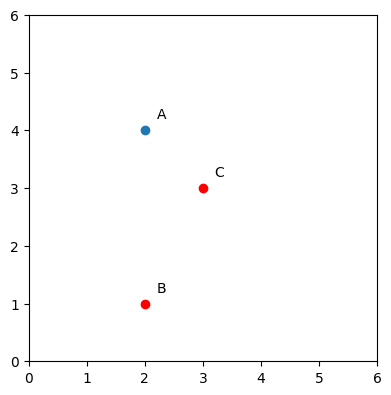

In [33]:
import numpy as np
from HelperClass.NeuralNet_1_2 import *
plt.figure(figsize=(4.5,4.5))
plt.xlim(0,6)
plt.ylim(0,6)
X = [2,2,3]
Y = [4,1,3]
plt.text(X[0]+0.2, Y[0]+0.2, 'A')
plt.text(X[1]+0.2, Y[1]+0.2, 'B')
plt.text(X[2]+0.2, Y[2]+0.2, 'C')
plt.scatter(X[0], Y[0])
plt.scatter(X[1], Y[1],c='r')
plt.scatter(X[2], Y[2],c='r')

平面上有三个点，分成两类，蓝色为正类，红色点为负类。各个点的坐标为：$A(2,4)，B(2,1)，C(3,3)$。  
假设神经网络第一次使用 $L_1$ 做为分类线，此时：$w_1=-1,w_2=2,b=-2$，我们来看一下它的图像

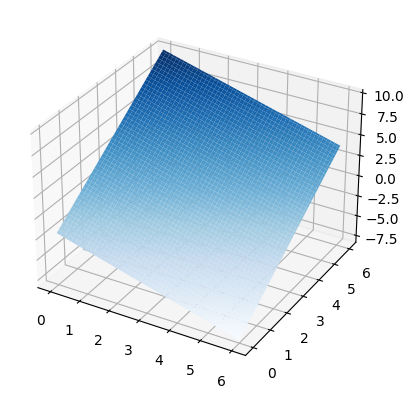

In [40]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
u = np.linspace(0, 6, 100)
v = np.linspace(0, 6, 100)
XM, YM = np.meshgrid(u, v)
R = np.zeros((len(u), len(v)))
for i in range(len(u)):
        for j in range(len(v)):
            R[i, j] = -XM[i, j] + 2*YM[i, j]-2
ax.plot_surface(XM, YM, R, cmap='Blues')

可以看到这是一个平面，它穿过z=0面形成了一条直线，在直线的一侧，z值为正，另一侧为负。我们可以利用这个平面来区分直线的两侧。也就是
$$z = x_{1} \cdot w_1 + x_{2} \cdot w_2 + b = 0$$

把 $x_2$ 留在等式左侧，其它的挪到右侧去，就可以得到一条直线的方程了：

$$x_{2} \cdot w_2 = -x_{1} \cdot w_1 - b$$
$$x_2 = -\frac{w_1}{w_2}x_1 - \frac{b}{w_2} \tag{3}$$
这个直线的方程画在平面图上可得：

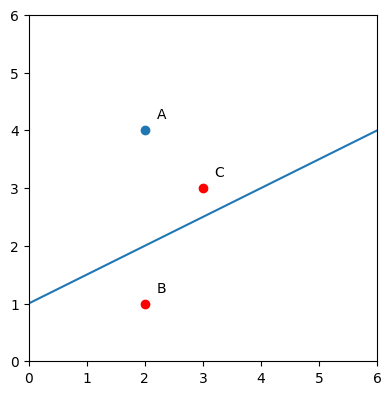

In [36]:
plt.figure(figsize=(4.5,4.5))
plt.xlim(0,6)
plt.ylim(0,6)
X = [2,2,3]
Y = [4,1,3]
plt.text(X[0]+0.2, Y[0]+0.2, 'A')
plt.text(X[1]+0.2, Y[1]+0.2, 'B')
plt.text(X[2]+0.2, Y[2]+0.2, 'C')
plt.scatter(X[0], Y[0])
plt.scatter(X[1], Y[1],c='r')
plt.scatter(X[2], Y[2],c='r')
x = np.linspace(0,6)
y = x/2 + 1
plt.plot(x,y)

我们来计算一下三个点的情况。

$A$点：

$$
z_A = (-1)\times 2 + 2 \times 4 -2 = 4 > 0 \tag{正确}
$$

$B$点：

$$
z_B = (-1)\times 2 + 2 \times 1 -2 = -2 < 0 \tag{正确}
$$

$C$点：

$$
z_C = (-1)\times 3 + 2 \times 3 -2 = 1 > 0 \tag{错误}
$$
我们知道当 $z>0$ 时，$Logistic(z) > 0.5$ 为正例，反之为负例，所以我们只需要看三个点的 $z$ 值是大于0还是小于0就可以了，不用再计算 $Logistic$ 函数值。

其中，$A,B$点处于正确的分类区，而 $C$ 点处于错误的分类区。此时 $C$ 点的损失函数值为（注意 $C$ 的标签值 $y=0$）：

$$
a_C = Logistic(z_C) = 0.731
$$

$$
loss_Z = -(0 \cdot \ln(0.731) + 1 \cdot \ln(1-0.731))=1.313
$$

$$
loss_A = 0.018, \quad loss_B = 0.112
$$

可见，对于分类正确的 $A,B$ 点来说，其损失函数值比 $C$ 点要小很多，所以 $C$ 点的反向传播的力度就大。对比总结如表6-5。

表6-5 对比三个点在各个环节的计算值

|点|坐标值|$z$ 值|$a$ 值|$y$ 值|$loss$ 值|分类情况|
|---|---|---|---|---|---|---|
|A|(2,4)|4|0.982|1|0.018|正确|
|B|(2,1)|-2|0.119|0|0.112|正确|
|C|(3,3)|1|0.731|0|1.313|错误|

- 在正例情况 $y=1$ 时，$a$ 如果越靠近 $1$，表明分类越正确，此时损失值会越小。点 $A$ 就是这种情况：$a=0.982$，距离 $1$ 不远；$loss$ 值 $0.018$，很小；
- 在负例情况 $y=0$ 时，$a$ 如果越靠近 $0$，表明分类越正确，此时损失值会越小。点 $B$ 就是这种情况：$a=0.119$，距离 $0$ 不远；$loss$ 值 $0.112$，不算很大；
- 点 $C$ 是分类错误的情况，$a=0.731$，本应小于 $0.5$，实际上距离 $0$ 远，距离 $1$ 反而近，它的 $loss=1.313$，与其它两个点的相对值来看非常大，这样误差就大，反向传播的力度也大。

这里可能会产生一个疑问：既然用 $z$ 值是否大于0这个条件就可以判断出分类是否正确，那么二分类理论中为什么还要用 $Logistic$ 函数做一次分类呢？

原因是这样的：只有 $z$ 值的话，我们只能知道是大于0还是小于0，并不能有效地进行反向传播，也就是说我们无法告诉神经网络反向传播的误差的力度有多大。比如 $z=5$ 和 $z=-1$ 相比，难度意味着前者的力度是后者的5倍吗？

而有了 $Logistic$ 分类计算后，得到的值是一个 $(0,1)$ 之间的概率，比如：当 $z=5$ 时，$Logistic(5) = 0.993$；当 $z=-1$ 时，$Logistic(-1)=0.269$。这两个数值的含义是这两个样本在分类区内的概率，前者概率为 $99.3%$，偏向正例，后者概率为 $26.9%$，偏向负例。然后再计算损失函数，就可以得到神经网络可以理解的反向传播误差，比如上面曾经计算过的 $loss_A,loss_B,loss_C$。
